In [4]:
import random
import math
class Model:
    def __init__(self):
        super().__init__()
        self.layers = []

    class Layer:
        def __init__(self, LR, Activation):
            if Activation in ['sigmoid', 'tanh' , 'relu']:
                self.Activation = Activation
                self.LR = LR
                self.weights = []
                self.bias = random.uniform(1, 5)
            else:
                raise ValueError(f'{Activation} is not implemented; choose from ["sigmoid", "tanh"] ')

    def add_layer(self, LR, Activation):
        self.layers.append(self.Layer(LR=LR, Activation=Activation))

    def predd(self, inputs, lay):
        preds = []
        for i in inputs:
            z = 0
            for x, w in zip(i, lay.weights[1:]):
                z += w * x

            if lay.Activation == 'sigmoid':
               s = 1 / (1 + math.exp(-z))
            elif lay.Activation == 'tanh':
                s = math.tanh(z)
            elif lay.Activation == 'relu':
                s = max(0,z)
            if s <= 0:
                   y_pred = -1
            else : y_pred = 1
            preds.append(y_pred)

        return preds

    def update_weights(self, inputs, y_train, y_preds, lay):
        new_params = []

        for i, w in enumerate(lay.weights):
            s = 0
            for x, ya, yp in zip(inputs, y_train, y_preds):
                # print(x ,ya , yp)
                s += (yp - ya) * x[i]
            par_dev = s / len(inputs)

            new_w = w - (lay.LR * par_dev)
            new_params.append(new_w)

        lay.weights = new_params

    def fit(self, x_train, y_train , epochs = 300):
        for i in range(len(x_train[0]) + 1):
            self.layers[0].weights.append(random.uniform(-1, 1))

        for L in self.layers[1:]:
            for i in range(2):
                L.weights.append(random.uniform(-1, 1))
        

        for eps in range(epochs):
            inputs = [[] for _ in range(len(self.layers))]
            preds = []
            for i in x_train:
                inputs[0].append(tuple([self.layers[0].bias] + list(i)))


            for i in range(len(self.layers)):
                # print(f'layer number {i}')
                # print('w0 =', '%5.2f' % self.layers[i].weights[0], ', w1 =', '%5.2f' % self.layers[i].weights[1])    
                p = self.predd(inputs[i], self.layers[i])
                preds.append(p)
                if i == len(self.layers) - 1:
                    inputs.append(p)
                else:
                    inputs[i + 1].extend([(self.layers[i + 1].bias,) + (pp,) for pp in p])
                for i in range(len(self.layers)):
                    self.update_weights(inputs[i], y_train, p, self.layers[i])
                    # print(self.layers[i].weights)
        print('train predictions: ' ,preds[-1])

    def predict(self , x):
        inputs = [[] for _ in range(len(self.layers))]

        for i in x:
            inputs[0].append(tuple([self.layers[0].bias] + list(i)))

        for i in range(len(self.layers)):
            p = self.predd(inputs[i], self.layers[i])
            if i == len(self.layers) - 1:
                return p
            else:
                inputs[i + 1].extend([(self.layers[i + 1].bias,) + (pp,) for pp in p])




#trying it out with OR Gate
mod = Model()
mod.add_layer(LR=0.01, Activation='sigmoid')
mod.add_layer(LR=0.01, Activation='tanh')



x_train = [[-1.0, -1.0], [-1.0, 1.0], [1.0, -1.0], [1.0, 1.0]]
y_train = [-1, 1, 1, 1]
mod.fit(x_train, y_train , epochs=1000)
print(mod.predict(x_train))

train predictions:  [1, 1, 1, 1]
[1, 1, 1, 1]


In [5]:
#iris dataset
import pandas as pd
iris = pd.read_csv(r"C:\Users\Hp\Desktop\Iris.csv") 
iris = iris[iris['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
mapp = {'Iris-setosa' : 1 , 'Iris-versicolor' : -1}

iris['Species'] = iris['Species'].map(mapp)
iris.drop('Id' , axis= 1 , inplace=True)

y = iris.pop('Species').tolist()


#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(iris , y , train_size= 0.8)


xtrain = [tuple(x) for x in X_train.values]
xtest = [tuple(x) for x in X_test.values]



In [10]:
mod = Model()
mod.add_layer(LR=0.01, Activation='sigmoid')
mod.add_layer(LR=0.01, Activation='tanh')

mod.fit(xtrain, y_train , epochs=1000)
print(mod.predict(xtrain))
from sklearn.metrics import accuracy_score
print('accuracy_score: ' , accuracy_score(y_test , mod.predict(xtest)))

train predictions:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy_score:  0.45


In [13]:
mod = Model()
mod.add_layer(LR=0.001, Activation='tanh')
mod.add_layer(LR=0.001, Activation='sigmoid')

mod.fit(xtrain, y_train , epochs=1000)
print(mod.predict(xtrain))
from sklearn.metrics import accuracy_score
print('accuracy_score: ' , accuracy_score(y_test , mod.predict(xtest)))

train predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy_score:  0.45


In [21]:
mod = Model()
mod.add_layer(LR=0.001, Activation='relu')
mod.add_layer(LR=0.001, Activation='relu')

mod.fit(xtrain, y_train , epochs=1000)
print(mod.predict(xtrain))
from sklearn.metrics import accuracy_score
print('accuracy_score: ' , accuracy_score(y_test , mod.predict(xtest)))

train predictions:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
accuracy_score:  0.55


In [22]:
mod = Model()
mod.add_layer(LR=0.01, Activation='relu')
mod.add_layer(LR=0.01, Activation='sigmoid')

mod.fit(xtrain, y_train , epochs=2000)
print(mod.predict(xtrain))
from sklearn.metrics import accuracy_score
print('accuracy_score: ' , accuracy_score(y_test , mod.predict(xtest)))

train predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy_score:  0.45


In [23]:
mod = Model()
mod.add_layer(LR=0.01, Activation='relu')
mod.add_layer(LR=0.01, Activation='relu')

mod.fit(xtrain, y_train , epochs=5000)
print(mod.predict(xtrain))
from sklearn.metrics import accuracy_score
print('accuracy_score: ' , accuracy_score(y_test , mod.predict(xtest)))

train predictions:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
accuracy_score:  0.55


- it is predicting same output for each record 
- i have tried changing epoches , Lr and number layers 
- i think i have probably made mistake in activation fucntion

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def plot(w,x,y):
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    x_values = np.linspace(-2, 2, 100)  

    y_values = m * x_values + b

    plt.plot(x_values, y_values, label='Decision Boundary', color='red')

    x_values = [point[1] for point in x]
    y_values = [point[2] for point in x]

    for i in range(len(x)):
        marker = 'x' if y[i] == 1 else 'o'
        plt.scatter(x_values[i], y_values[i], marker=marker)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundry')
    plt.legend()
    plt.grid(True)
    plt.show()


[-1.7876217182281688, -13.900052607614384, 3.1164210394429395, -29.813529333364617, -10.974670903512937]


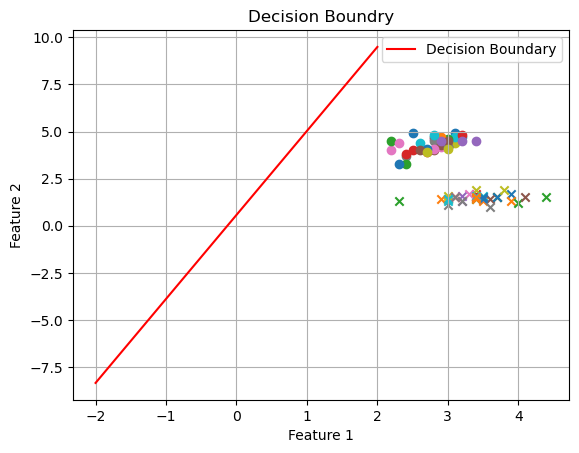

In [11]:
import numpy as np
new_list = [(t[0], t[1] , t[2]) for t in xtrain]
print(mod.layers[0].weights)
plot(mod.layers[0].weights,new_list,y_train)